# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [70]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import math
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [71]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

# Import Data

In [72]:
# Import the CSVs to Pandas DataFrames
file_path_cencus = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path_cencus, index_col="year")
sfo_data2 = pd.read_csv(file_path_cencus)
file_path_coordinates = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path_coordinates)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [73]:
### Visualization Functions
def housing_units_per_year():
#      """Housing Units Per Year."""
    housing_units = (sfo_data
                    .groupby(sfo_data.index)
                    .mean().drop(['sale_price_sqr_foot','gross_rent'],axis=1)
    )
    
    fig_avg_housing_units = plt.figure()
    housing_units_yr= housing_units.hvplot.bar('year',
                   label='Average Housing Units',
                   rot=80, 
                   ylim=(roundown(housing_units.min()),
                         roundup(housing_units.max()))
    ).opts(yformatter='%d')
    plt.close(fig_avg_housing_units)
    return housing_units_yr

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    df_avg_costs = (
            sfo_data[["sale_price_sqr_foot", "gross_rent"]]
            .groupby(sfo_data.index)
            .mean()
    )
    fig_avg_gross_rent = plt.figure()
    plot_avg_gross_rent = df_avg_costs["gross_rent"].plot()
    plot_avg_gross_rent.set_xlabel("Year", fontsize=12)
    plot_avg_gross_rent.set_ylabel("Gross Rent", fontsize=12)
    plot_avg_gross_rent.set_title(
        "Average Gross Rent in San Francisco", fontsize=14, fontweight="bold"
    )
    plt.close(fig_avg_gross_rent)
    return pn.pane.Matplotlib(fig_avg_gross_rent, tight=True)

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    df_avg_costs = (
            sfo_data[["sale_price_sqr_foot", "gross_rent"]]
            .groupby(sfo_data.index)
            .mean()
    )
    fig_avg_sales_price = plt.figure()
    plot_avg_gross_rent = df_avg_costs["sale_price_sqr_foot"].plot(kind='line')
    plot_avg_gross_rent.set_xlabel("Year", fontsize=12)
    plot_avg_gross_rent.set_ylabel("sale_price_sqr_foot", fontsize=12)
    plot_avg_gross_rent.set_title(
        "Average Sales Price in San Francisco", fontsize=14, fontweight="bold"
    )
    plt.close(fig_avg_sales_price)
    return pn.pane.Matplotlib(fig_avg_sales_price, tight=True)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    avg_neighbohood_price = (sfo_data
                    .groupby([sfo_data.index,'neighborhood'])
                    .mean().drop(['housing_units','gross_rent'],axis=1)
    )
    
    fig_avg_housing_units = plt.figure()
    housing_units_yr= avg_neighbohood_price.hvplot('year',groupby='neighborhood',label='Average price per sq ft',rot=80)
    plt.close(fig_avg_housing_units)
    return housing_units_yr

def top_most_expensive_neighborhoods():
    top_10_expensive_neighborhoods =(
        sfo_data
        .groupby('neighborhood')
        .sale_price_sqr_foot
        .mean()
        .sort_values()
        .iloc(axis=0)[-10:]
    )
    fig_top_expensive_neighborhoods = plt.figure()
    top_expensive_neighborhoods= top_10_expensive_neighborhoods.hvplot.bar(rot=80,ylim=(600,950))
    plt.close(fig_top_expensive_neighborhoods)
    return top_expensive_neighborhoods

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    neighborhoods_info_PC=sfo_data2.groupby('neighborhood',as_index=False).mean().sort_values('sale_price_sqr_foot').iloc(axis=0)[-10:].sort_values('sale_price_sqr_foot',ascending=False)
#     top_10_expensive_neighborhoods=neighborhoods_info.iloc(axis=0)[-10:].sort_values('sale_price_sqr_foot',ascending=False)
   
    fig_parallel_coordinates = plt.figure()
    parallel_coordinates= px.parallel_coordinates(neighborhoods_info_PC,color='sale_price_sqr_foot')
    plt.close(fig_parallel_coordinates)
    return parallel_coordinates

def neighborhood_map():
#     """Neighborhood Map"""
    df_neighborhood_locations['neighborhood']=df_neighborhood_locations.Neighborhood
    neighborhoods_load=sfo_data2.groupby('neighborhood',as_index=False).mean().sort_values('sale_price_sqr_foot')
    neighborhoods_load=neighborhoods_load.sort_values('neighborhood').drop('year',axis=1)
    mapbox_data=pd.merge(neighborhoods_load,df_neighborhood_locations, how ='inner').drop('Neighborhood',axis=1)
    fib_mapbox = plt.figure()
    mapbox_data = px.scatter_mapbox(
        mapbox_data,
        lat="Lat",
        lon="Lon",
            size="sale_price_sqr_foot",
            color="gross_rent",
            hover_name  ='neighborhood',
            color_continuous_scale=px.colors.cyclical.IceFire,
            title="Average Sale Price Per Square Food and Gross Rent in San Francisco",
            zoom=10,
            width=1000,
    )
    plt.close(fib_mapbox)
    return mapbox_data

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars, name='interactive07648')
    [1] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure, tight=True)
    [2] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure, tight=True)
    [3] Column
        [0] Column()
        [1] Row
            [0] Row(name='interactive07772')
                [0] HoloViews(DynamicMap, name='interactive07772')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [4] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars, name='interactive07814')
    [5] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive07882')
    [6] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive07888')
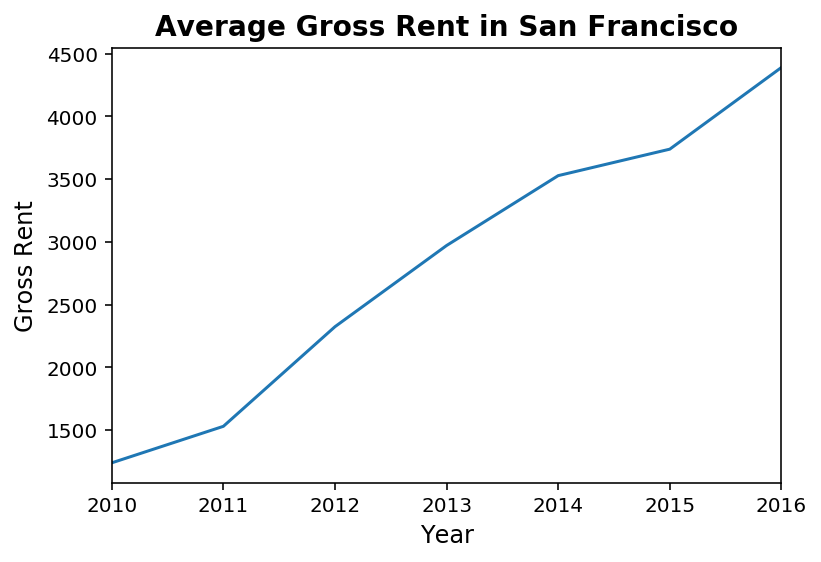
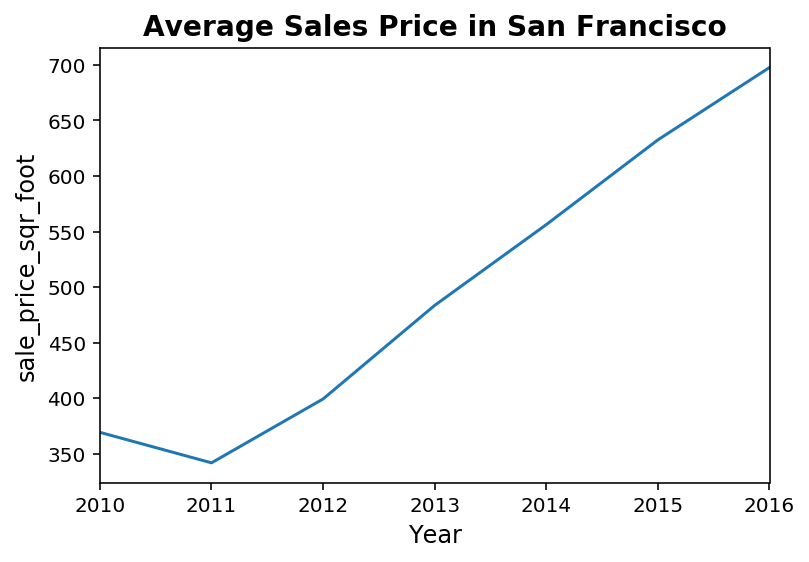

In [74]:
crime_pop_dashboard = pn.Tabs(
("Housing Units Per", housing_units_per_year),
("Avg Gross Rent", average_gross_rent),
("Average Sales Price", average_sales_price),
("Average Annual Neighborhood Price", average_price_by_neighborhood),
("Top Most Expensive Neighborhoods", top_most_expensive_neighborhoods),
("Parallel Coordinates Plot", parallel_coordinates),
("Mapbox Visualization", neighborhood_map))
crime_pop_dashboard

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars, name='interactive07648')
    [1] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure, tight=True)
    [2] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure, tight=True)
    [3] Column
        [0] Column()
        [1] Row
            [0] Row(name='interactive07772')
                [0] HoloViews(DynamicMap, name='interactive07772')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [4] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars, name='interactive07814')
    [5] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive07882')
    [6] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive07888')
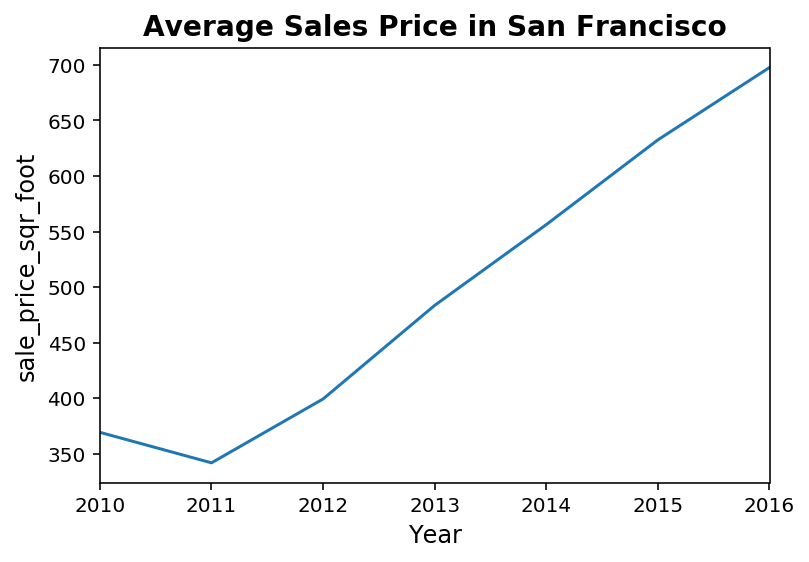
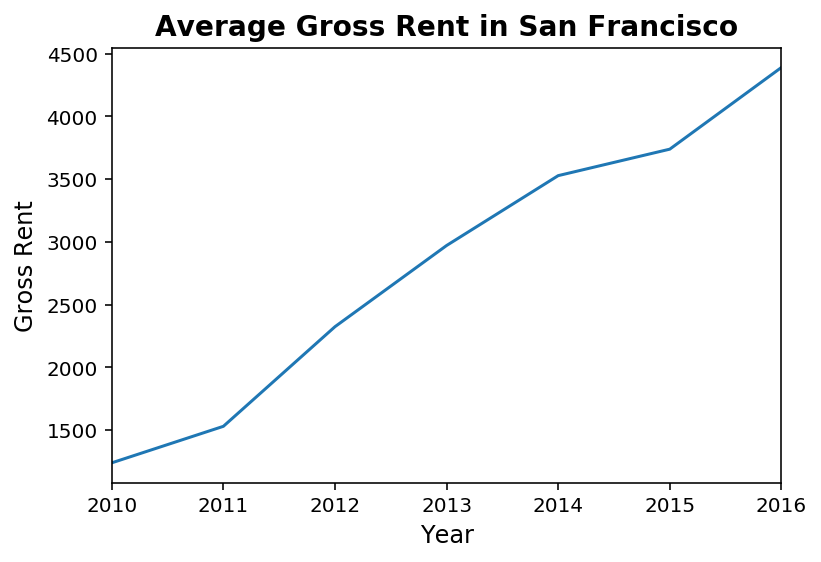

In [75]:
crime_pop_dashboard.servable()